#### 1. IMDB 데이터셋 로드하기  
imdb 데이터는 영화 리뷰의 긍정, 부정 데이터로 각 리뷰는 숫자 시퀀스로 변환되어 바로 데이터 모델링에 사용이 가능  
**0 : 부정, 1: 긍정**

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 가장 빈번히 등장하는 단어 10000개를 기준으로 분류

#### 2. 정수 시퀀스를 이진행렬로 One-Hot Encoding 진행  

데이터에 단어가 존재하면 1, 존재하지 않으면 0으로 인코딩을 진행하여 총 25000, 10000의 크기의 텐서로 변환


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension)) # 25000, 10000의 0 행렬
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1. # 특정 인덱스는 1로 변환
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 3. 모델 정의하기  
활성화 함수가 없다면 Dense 층은 선형적인 연산만을 할 수 있기에 비선형적 연산을 위해 존재

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### 4. 검증 세트 준비하기

In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### 5. 모델 훈련하기

In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 82ms/step - loss: 0.5143 - acc: 0.7867 - val_loss: 0.3807 - val_acc: 0.8710
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3041 - acc: 0.9033 - val_loss: 0.3048 - val_acc: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2189 - acc: 0.9312 - val_loss: 0.2788 - val_acc: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1755 - acc: 0.9433 - val_loss: 0.2940 - val_acc: 0.8833
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1442 - acc: 0.9533 - val_loss: 0.2776 - val_acc: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1194 - acc: 0.9627 - val_loss: 0.2955 - val_acc: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0980 - acc: 0.9725 - val_loss: 0.3071 - val_acc: 0.8850
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0821 - a

#### 6. 훈련과 검증 손실 그리기

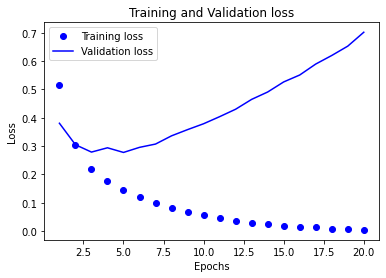

In [6]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # bo : 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b : 파란색 선
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 7. 훈련과 검증 정확도 그리기

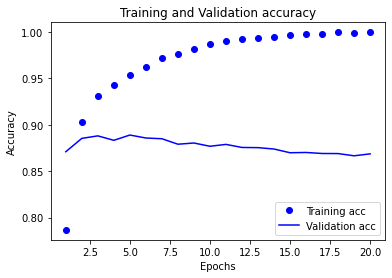

In [7]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc') # bo : 파란색 점
plt.plot(epochs, val_acc, 'b', label='Validation acc') # b : 파란색 선
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()